### 总的公式如下：
#### 二阶位力系数
$$b_2=exp(-\frac{E_{bound}}{k_BT})+\int_0^\infty exp(-\frac{\hbar^2k^2}{mk_BT})\frac{1}{\pi}\frac{d\delta_0}{dk}dk $$
#### 用这个计算相互作用能
$$ \epsilon_{int}= \frac{3k_BTn}{2}(n\lambda^3)[-\frac{b_2}{\sqrt{2}}+\frac{\sqrt{2}}{3}T\frac{\partial b_2}{\partial T}] $$
#### 其中$b_2$中包含两项：束缚态项、散射态项。
### 下面我们分开处理这两项，先导入必要的包

In [1]:
#导入必要的包
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root
import sys

### Bound state的计算
#### 下面是算bound_state采用的参数，这里最终过渡到无量纲化（以$E_F$和$k_F$为单位）

In [2]:
#国际单位制下的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34
k_B=1.38064852e-23

#国际单位制下的原子参数
n=2e19
T=1e-6
ap=1900*Bohr_radius
am=200*Bohr_radius
m=173.04*u

#计算国际单位制下的中间参数
as0=(ap+am)/2
as1=(am-ap)/2
kF=(3*np.pi**2*n)**(1/3)
E0=hbar**2*(kF)**2/2/m

#定义无量纲化中间参数
gp=4*np.pi*hbar**2*ap/m*kF**3/E0/(2*np.pi)**2
gm=4*np.pi*hbar**2*am/m*kF**3/E0/(2*np.pi)**2

print('费米能是'+str(E0)+'J')
print('费米动量是'+str(kF))
print(gp,gm)

费米能是1.3646683766118282e-30J
费米动量是8397506.176105903
0.5373283164486367 0.056560875415645966


In [3]:
def delta(B):
    return 112*2*np.pi*hbar*B/E0

def integrand_Bound_1(k,EM):
    return (EM-delta(B))/(2*k**2+delta(B)-EM)
def integrand_Bound_2(k,EM):
    return EM/(2*k**2-EM)
def itg_Bound_1(EM):
    return quad(integrand_Bound_1, 0, np.inf, args=(EM))[0]
def itg_Bound_2(EM):
    return quad(integrand_Bound_2, 0, np.inf, args=(EM))[0]

def Bound_eq(EM):
    return  1/(gp*gm) + 0.5*(1/gp+1/gm)*(itg_Bound_1(EM)+itg_Bound_2(EM)) + itg_Bound_1(EM)*itg_Bound_2(EM)


x1=np.arange(70,167.5,0.1)#x1是前半部分



Bound_sta=[]
chu=-1.158460277006417
for B in x1:
    solution=optimize.root(Bound_eq, chu, tol=1e-15)
    chu=solution.x[0]
    solution1=solution.x[0]#-delta-1
    Bound_sta.append(solution1)

In [4]:
eint_Bound=[]
for E_Bound in Bound_sta:
    term=(-2+4/3*E_Bound*E0/k_B/T)*np.exp(-E_Bound*E0/k_B/T)
    eint_Bound.append(term)
print(eint_Bound)
#此时eint_Bound是在B取x1区间上的eint中的bound部分。

[-2.4138326027127532, -2.4130720420428102, -2.4123121529453875, -2.4115529353369514, -2.410794389011883, -2.4100365137959607, -2.409279309515669, -2.4085227759981893, -2.4077669130714106, -2.407011720563921, -2.4062571983050165, -2.4055033461246933, -2.4047501638536586, -2.4039976513233183, -2.4032458083657864, -2.402494634813886, -2.4017441305011427, -2.4009942952617913, -2.4002451289307762, -2.3994966313437462, -2.3987488023370602, -2.398001641747789, -2.39725514941371, -2.396509325173312, -2.395764168865794, -2.3950196803310657, -2.3942758594097517, -2.3935327059431866, -2.392790219773418, -2.392048400743206, -2.3913072486960267, -2.390566763476069, -2.389826944928237, -2.389087792898153, -2.3883493072321507, -2.387611487777284, -2.3868743343813223, -2.3861378468927543, -2.3854020251607855, -2.3846668690353403, -2.3839323783670654, -2.383198553007321, -2.3824653928081965, -2.3817328976224954, -2.381001067303747, -2.380269901706201, -2.3795394006848296, -2.3788095640953313, -2.378080

In [5]:
##给精确的也算一下boundstate

In [6]:
x3=np.arange(70,154,0.1)
Bound_sta1=[]
chu=-1.158460277006417
for B in x3:
    solution=optimize.root(Bound_eq, chu, tol=1e-15)
    chu=solution.x[0]
    solution1=solution.x[0]#-delta-1
    Bound_sta1.append(solution1)
eint_Bound1=[]
for E_Bound in Bound_sta1:
    term=(-2+4/3*E_Bound*E0/k_B/T)*np.exp(-E_Bound*E0/k_B/T)
    eint_Bound1.append(term)
print(eint_Bound1)

[-2.4138326027127532, -2.4130720420428102, -2.4123121529453875, -2.4115529353369514, -2.410794389011883, -2.4100365137959607, -2.409279309515669, -2.4085227759981893, -2.4077669130714106, -2.407011720563921, -2.4062571983050165, -2.4055033461246933, -2.4047501638536586, -2.4039976513233183, -2.4032458083657864, -2.402494634813886, -2.4017441305011427, -2.4009942952617913, -2.4002451289307762, -2.3994966313437462, -2.3987488023370602, -2.398001641747789, -2.39725514941371, -2.396509325173312, -2.395764168865794, -2.3950196803310657, -2.3942758594097517, -2.3935327059431866, -2.392790219773418, -2.392048400743206, -2.3913072486960267, -2.390566763476069, -2.389826944928237, -2.389087792898153, -2.3883493072321507, -2.387611487777284, -2.3868743343813223, -2.3861378468927543, -2.3854020251607855, -2.3846668690353403, -2.3839323783670654, -2.383198553007321, -2.3824653928081965, -2.3817328976224954, -2.381001067303747, -2.380269901706201, -2.3795394006848296, -2.3788095640953313, -2.378080

### boundstate结果与零阶结合
#### scatter部分的计算

In [7]:
#输入参数，其中T的单位是K，B的单位是Gauss，m的单位是unit，散射长度的单位是a0，注意如要改核磁矩差应在asc里改
T=1e-6
ap=1900
am=200
m=173.04

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2

#散射长度公式
#asc=(-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)


#数值计算相互作用能量
def integrand(x,B):
    asc = (-as0+5.57e-6*math.sqrt(m*B)*(as0**2-as1**2))/(as0*5.57e-6*math.sqrt(m*B)-1)
    return (0.6366-73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*(asc)/(1+(asc*x)**2) #考虑零阶
def eint(B):
    return quad(integrand, 0, np.inf, args=(B))[0]

#x1已经在Bound state里面包含了
x2=np.arange(70,250,0.1)
x3=np.arange(70,154,0.1)


Nobound0=[]
for B in x2:
    temp=eint(B)
    Nobound0.append(temp)


Bound0=[]
for B in x1:
    temp=eint(B)
    Bound0.append(temp)
Bound0=np.array(eint_Bound)+np.array(Bound0)
Bound0=list(Bound0)
print(Bound0)

<ipython-input-7-e42a1b6ab33e>:20: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand, 0, np.inf, args=(B))[0]


[-1.8456496290585904, -1.8445900086650249, -1.8435308981582816, -1.8424722971436416, -1.8414142051044222, -1.84035662155546, -1.8392995460124146, -1.8382429779917604, -1.8371869170107917, -1.8361313625876141, -1.8350763142411495, -1.8340217714911278, -1.8329677338580943, -1.8319142008633953, -1.8308611720291852, -1.8298086468784254, -1.8287566249348763, -1.8277051057231, -1.82665408876846, -1.825603573597113, -1.8245535597360134, -1.823504046712912, -1.8224550340563486, -1.8214065212956547, -1.820358507960952, -1.8193109935831466, -1.818263977693936, -1.8172174598257982, -1.816171439511995, -1.815125916286569, -1.8140808896843428, -1.8130363592409169, -1.8119923244926697, -1.810948784976755, -1.809905740231098, -1.808863189794398, -1.8078211332061245, -1.8067795700065172, -1.805738499736583, -1.8046979219380952, -1.8036578361535938, -1.8026182419263779, -1.8015791388005162, -1.8005405263208318, -1.7995024040329115, -1.7984647714830984, -1.7974276282184918, -1.7963909737869501, -1.79535

### boundstate结果与二阶结合

In [8]:
#定义计算函数
def integrand(x,r0,asc,B):
    return (0.6366-73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*(1/asc+r0*x**2/2)/((1/asc-r0*x**2/2)**2+x**2)
def eint(r0,asc,B):
    return quad(integrand, 0, np.inf, args=(r0,asc,B))[0]

Nobound1=[]
for B in x2:
    q=5.57e-6*math.sqrt(m*B)
    asc=(-as0+q*(as0**2-as1**2))/(as0*q-1)
    r0=-as1**2/q/(as0-q*(as0**2-as1**2))**2
    temp=eint(r0,asc,B)
    Nobound1.append(temp)

Bound1=[]
for B in x1:
    q=5.57e-6*math.sqrt(m*B)
    asc=(-as0+q*(as0**2-as1**2))/(as0*q-1)
    r0=-as1**2/q/(as0-q*(as0**2-as1**2))**2
    temp=eint(r0,asc,B)
    Bound1.append(temp)

Bound1=np.array(eint_Bound)+np.array(Bound1)
Bound1=list(Bound1)

### boundstate结果与精确但是有积分上限解结合

In [9]:
#精确
#数值计算相互作用能量
def bede(t,B):
    return np.arctan((-as0+(as0**2-as1**2)*np.sqrt(3.38e-11*m*B-t**2))/(1-as0*np.sqrt(3.38e-11*m*B-t**2))*t)
def de(x,B):
    return derivative(bede, x, dx=1e-15, args=(B,), order=3)
def integrand(x,B):
    return (-0.6366+73.52*x**2/m/T)*math.exp(-173.23*x**2/m/T)*de(x,B)
def eint(B):
    return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]

Nobound2=[]
for B in x2:
    temp=eint(B)
    Nobound2.append(temp)

<ipython-input-9-b187b89a32c6>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]
<ipython-input-9-b187b89a32c6>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]
<ipython-input-9-b187b89a32c6>:10: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

In [10]:
Bound2=[]
for B in x3:
    temp=eint(B)
    Bound2.append(temp)
Bound2=np.array(eint_Bound1)+np.array(Bound2)
Bound2=list(Bound2)

<ipython-input-9-b187b89a32c6>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]
<ipython-input-9-b187b89a32c6>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, np.sqrt(3.38e-11*m*B), args=(B))[0]
<ipython-input-9-b187b89a32c6>:10: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested

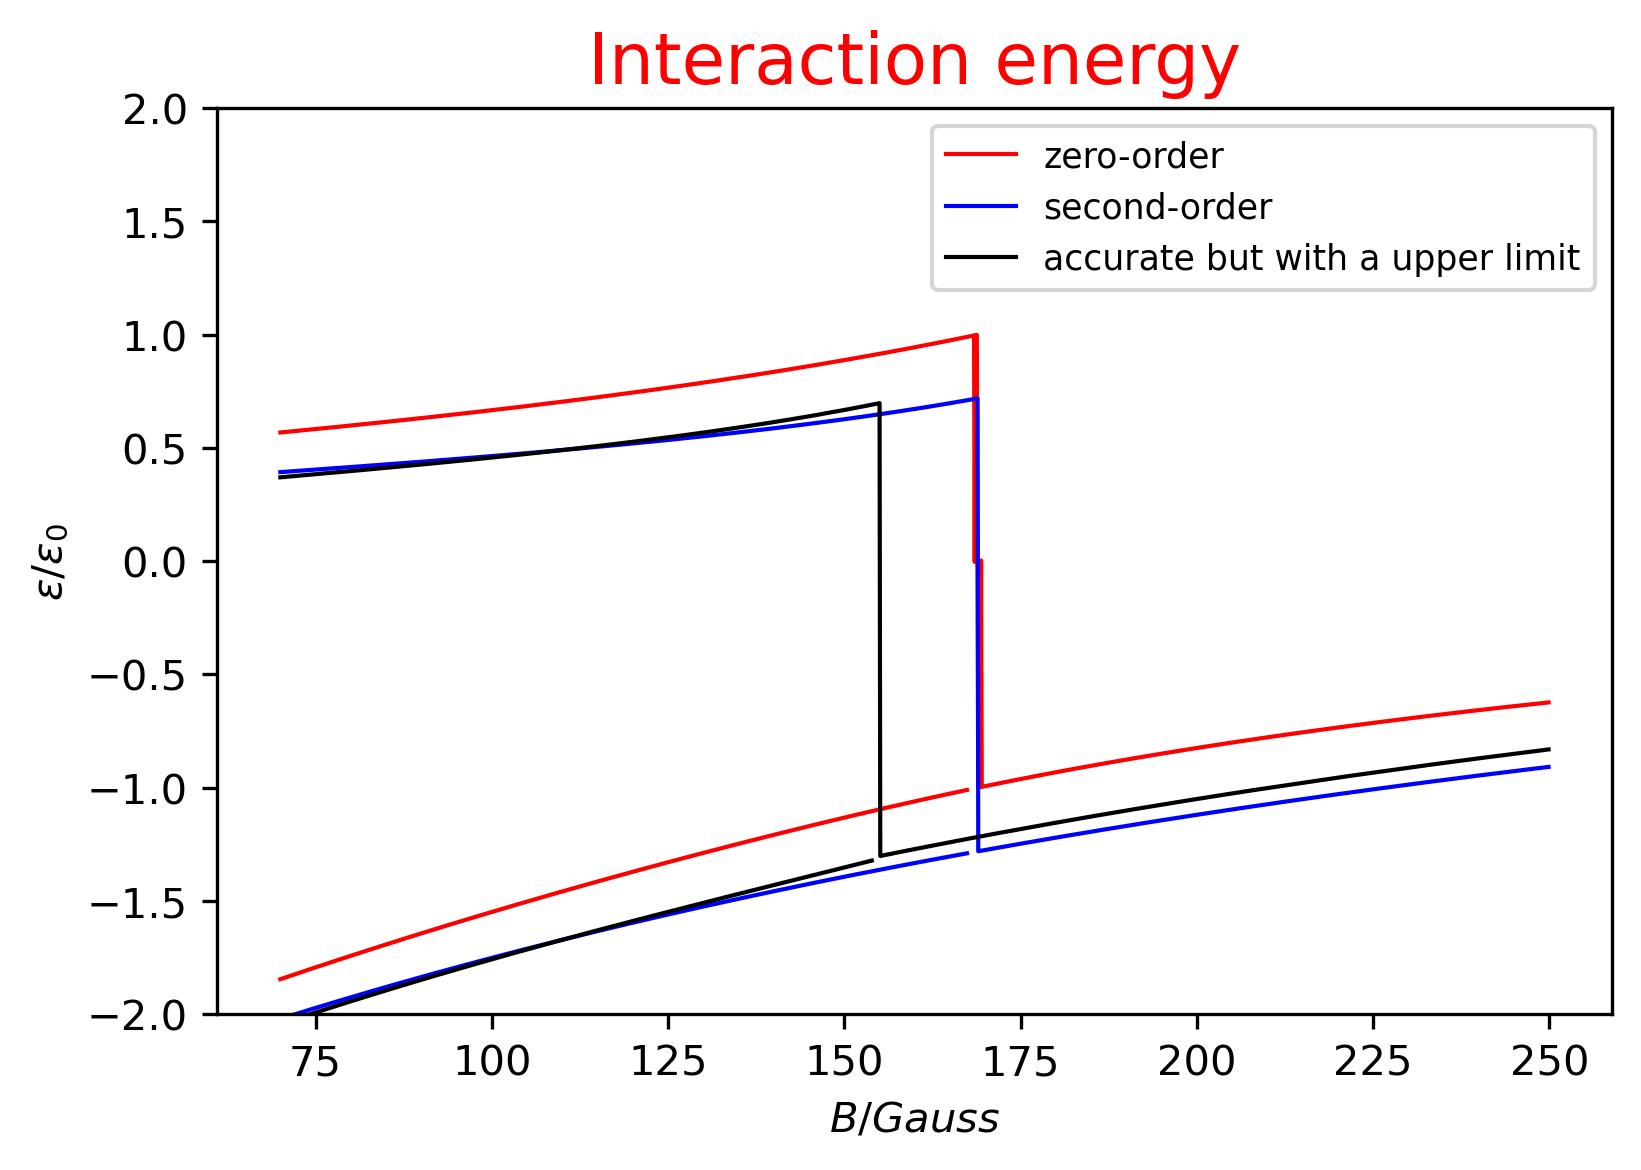

In [13]:
#下面是画图代码
plt.figure(num=2,dpi=300)
l0,=plt.plot(x2,Nobound0,color='r',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound0,color='r',linewidth=1.0,linestyle='-')
l1,=plt.plot(x2,Nobound1,color='b',linewidth=1.0,linestyle='-')
plt.plot(x1,Bound1,color='b',linewidth=1.0,linestyle='-')
l2,=plt.plot(x2,Nobound2,color='black',linewidth=1.0,linestyle='-')
plt.plot(x3,Bound2,color='black',linewidth=1.0,linestyle='-')

#plt.style.use('science')
ax=plt.gca()
plt.xlabel(r'$B/Gauss$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.ylim(-2,2)
plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Interaction energy',fontsize=17,color='r')
plt.show()